In [76]:
%matplotlib widget
from solver import *

from models import NPN, PNP, Diode, Resistor, VoltageSource, CurrentSource, OpAmp, Capacitor, Inductor
import sympy as sp

In [77]:
Vcc = 5

var = sp.Symbol("Vin", real=True)

In [78]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    Diode("D1", {"Vp" : "Vout", "Vn" : Gnd}),
                    Resistor("R1", {"V1" : "Vout", "V2" : "Vc"}, R = 1e5),
                    Resistor("Rout", {"V1" : "Vc", "V2" : Gnd}, R = 1e7),
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V1_0 = 5),
)

{'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'Vout', 'Vn': 0}, 'values': {'Vd': 0.6}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 'Vc'}, 'values': {'R': 100000.0}},
 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 10000000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-06, 'V1_0': 5, 'V2_0': 0}}}

In [94]:
multivibrator = Solver.Circuit("multivibrator")
multivibrator.element(
    Resistor("R", {"V1" : "Vc", "V2" : "Vout"}, R = 50e3),
    OpAmp("Op1", {"V+" : "V+", "V-" : "Vc", "Vop" : "Vout", "Vcc" : Vcc, "Vee" : -Vcc}),
    Resistor("R1", {"V1" : "Vout", "V2" : "V+"}, R = 35e3),
    Resistor("R2", {"V1" : "V+", "V2" : Gnd}, R = 30e3),
    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, C = 10e-9, V1_0 = 2.5, V2_0 = 0),
)

{'R': {'name': 'R', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'R': 50000.0}},
 'Op1': {'name': 'Op1', 'type': 'OpAmp', 'nodes': {'V+': 'V+', 'V-': 'Vc', 'Vop': 'Vout', 'Vcc': 5, 'Vee': -5}, 'values': {'Av': oo}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 'V+'}, 'values': {'R': 35000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'V+', 'V2': 0}, 'values': {'R': 30000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-08, 'V1_0': 2.5, 'V2_0': 0}}}

In [95]:
Solver.setMain("multivibrator")
compiled = Solver.compile()

In [96]:
model = Solver.solveTran(compiled, 2e-3, 1e-6, debugLog = False)

{'Op1', 'R', 'R1', 'C1', 'R2'} {'Op1': 'SatMin'} {I0_0: 0.00015*exp(-2000.0*t), I0_1: -0.00015*exp(-2000.0*t), I1_0: 0, I1_1: 0, I1_2: 7.69230769230769e-5 + 0.000149999999999999*exp(-2000.0*t), I2_0: -7.69230769230769e-5, I2_1: 7.69230769230769e-5, I3_0: -7.69230769230769e-5, I3_1: 7.69230769230769e-5, I4_0: -0.00015*exp(-2000.0*t), I4_1: 0.00015*exp(-2000.0*t), V0: -5.0 + 7.5*exp(-2000.0*t), V1: -2.30769230769231, V2: -5.00000000000000, I1_3: 0, I1_4: 0} [-V0 + V1 < 0.0]
0.000514000000000006
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
{'Op1', 'R', 'R1', 'C1', 'R2'} {'Op1': 'SatMax'} {I0_0: -0.000146341746652933*exp(-2000.0*t), I0_1: 0.000146341746652933*exp(-2000.0*t), I1_0: 0, I1_1: 0, I1_2: -7.69230769230769e-5 - 0.000146341746652933*exp(-2000.0*t), I2_0: 7.69230769230769e-5, I2_1: -7.69230769230769e-5, I3_0: 7.69230769230769e-5, I3_1: -7.69230769230769e-5, I4_0: 0.000146341746652933*exp(-2000.0*t), I4_1: -0.000146341746652933*exp(-2000.0*t), V0: 5.0 - 7.31708733264662*exp(-2000

In [97]:
V2 = compiled["nodes"]["Vout"]
Vc = compiled["nodes"]["Vc"]

-------------------------------------
{'Op1': 'SatMin'}
Vin ∈ Interval(0, 0.000513000000000006)
{I0_0: 0.00015*exp(-2000.0*t), I0_1: -0.00015*exp(-2000.0*t), I1_0: 0, I1_1: 0, I1_2: 7.69230769230769e-5 + 0.000149999999999999*exp(-2000.0*t), I2_0: -7.69230769230769e-5, I2_1: 7.69230769230769e-5, I3_0: -7.69230769230769e-5, I3_1: 7.69230769230769e-5, I4_0: -0.00015*exp(-2000.0*t), I4_1: 0.00015*exp(-2000.0*t), V0: -5.0 + 7.5*exp(-2000.0*t), V1: -2.30769230769231, V2: -5.00000000000000, I1_3: 0, I1_4: 0}
-------------------------------------
-------------------------------------
{'Op1': 'SatMax'}
Vin ∈ Interval(0.000514000000000006, 0.00101400000000001)
{I0_0: -0.000409093860285699*exp(-2000.0*t), I0_1: 0.000409093860285699*exp(-2000.0*t), I1_0: 0, I1_1: 0, I1_2: -7.69230769230769e-5 - 0.000409093860285701*exp(-2000.0*t), I2_0: 7.69230769230769e-5, I2_1: -7.69230769230769e-5, I3_0: 7.69230769230769e-5, I3_1: -7.69230769230769e-5, I4_0: 0.000409093860285699*exp(-2000.0*t), I4_1: -0.0004090

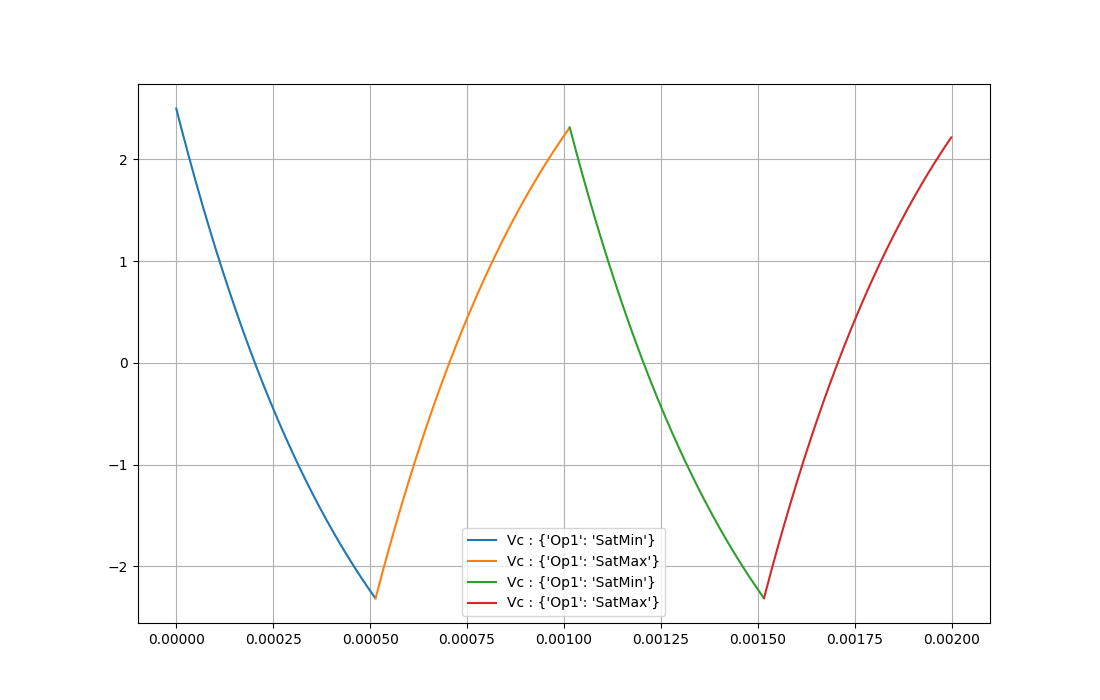

In [99]:
measurments =   [   
                    #(lambda sol : V2.subs(sol), "V2"),
                    (lambda sol : Vc.subs(sol), "Vc"),
                ]

fig, ax = plt.subplots(figsize=[11, 7])

Solver.printModel(model, var)
plotTranMeasurments(model, 0, 2e-3, 1e-6, measurments)
plt.legend(loc="best");
plt.grid(True);
plt.show()